In [2]:
#import dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Establish CSV path for relevant files
# csv_path1 = "Player Historical Trade Tweets/NigelBradham_Trans_1.csv"
csv_path2 = "Player Historical Trade Tweets/NigelBradham_Trans_2.csv"
csv_path3 = "Player Historical Trade Tweets/NigelBradham_Trans_3.csv"

#Establish pd dataframe for each file
# nigelbradham1 = pd.read_csv(csv_path1, sep=";")
nigelbradham2 = pd.read_csv(csv_path2, sep=";")
nigelbradham3 = pd.read_csv(csv_path3, sep=";")


#concatenate data frames 
nigelbradham_master = pd.concat([nigelbradham2, nigelbradham3])
nigelbradham_master

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2016-03-15 18:54,0,0,Dat boy @ NigelBradham_13 wit da eagles,NaN,@,NaN,7.098905e+17,https://twitter.com/3k10Milk/status/7098905458...
1,NaN,2016-03-15 16:31,0,0,"Nigel Bradham Highlights Welcome To Philly"" ht...",NaN,NaN,NaN,7.098545e+17,https://twitter.com/Reddit_Eagles/status/70985...
2,NaN,2016-03-15 13:11,1,1,# PhiladelphiaEagles # Video Inside The Studio...,NaN,NaN,# # # #,7.098042e+17,https://twitter.com/PhilEaglesViews/status/709...
3,NaN,2016-03-15 12:34,0,0,[NFL: Philadelphia Eagles] - Inside The Studio...,NaN,NaN,NaN,7.097949e+17,https://twitter.com/NFL_FanTeam_Ldr/status/709...
4,NaN,2016-03-15 12:30,1,0,# NFL FSU Football: Nigel Bradham signs with P...,NaN,NaN,# #,7.097940e+17,https://twitter.com/Eagles_FZ/status/709794010...
5,NaN,2016-03-15 12:23,0,0,http://philadelphiaeagles.com >> Inside The St...,NaN,NaN,NaN,7.097922e+17,https://twitter.com/eaglesbuzztap/status/70979...
6,NaN,2016-03-15 12:22,0,1,@ walterfootball Nigel Bradham signing grade n...,NaN,@,NaN,7.097920e+17,https://twitter.com/patburnett3/status/7097919...
7,NaN,2016-03-15 10:25,0,0,@ walterfootball grade the Nigel Bradham signi...,NaN,@ @,NaN,7.097624e+17,https://twitter.com/patburnett3/status/7097623...
8,NaN,2016-03-15 09:21,0,0,Joueurs signés : Brandon Brooks (OG) Rodney Mc...,NaN,NaN,NaN,7.097463e+17,https://twitter.com/EaglesFR/status/7097463124...
9,NaN,2016-03-15 07:57,0,0,@ nflnetwork # FASuccess Nigel bradham,NaN,@,#,7.097253e+17,https://twitter.com/ImExponents/status/7097252...


In [3]:
#fillna's with text to fix error
nigelbradham_master["text"].fillna("text", inplace=True)
nigelbradham_master.head()


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2016-03-15 18:54,0,0,Dat boy @ NigelBradham_13 wit da eagles,NaN,@,NaN,7.098905e+17,https://twitter.com/3k10Milk/status/7098905458...
1,NaN,2016-03-15 16:31,0,0,"Nigel Bradham Highlights Welcome To Philly"" ht...",NaN,NaN,NaN,7.098545e+17,https://twitter.com/Reddit_Eagles/status/70985...
2,NaN,2016-03-15 13:11,1,1,# PhiladelphiaEagles # Video Inside The Studio...,NaN,NaN,# # # #,7.098042e+17,https://twitter.com/PhilEaglesViews/status/709...
3,NaN,2016-03-15 12:34,0,0,[NFL: Philadelphia Eagles] - Inside The Studio...,NaN,NaN,NaN,7.097949e+17,https://twitter.com/NFL_FanTeam_Ldr/status/709...
4,NaN,2016-03-15 12:30,1,0,# NFL FSU Football: Nigel Bradham signs with P...,NaN,NaN,# #,7.097940e+17,https://twitter.com/Eagles_FZ/status/709794010...


In [4]:
#create list of sentiment scores associated with tweets about relevant player

nigelbradham_sent = []

tweets = nigelbradham_master["text"]

for index,tweet in nigelbradham_master.iterrows():
    results = analyzer.polarity_scores(tweet["text"])
    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]
        
    # Add sentiments for each tweet into an array
    nigelbradham_sent.append({"date": tweet["date"], 
                        "Compound": compound,
                        "Positive": pos,
                        "Negative": neu,
                        "Neutral": neg})
nigelbradham_sent



[{'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2016-03-15 18:54'},
 {'Compound': 0.4588,
  'Negative': 0.667,
  'Neutral': 0.0,
  'Positive': 0.333,
  'date': '2016-03-15 16:31'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2016-03-15 13:11'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2016-03-15 12:34'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2016-03-15 12:30'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2016-03-15 12:23'},
 {'Compound': 0.5859,
  'Negative': 0.625,
  'Neutral': 0.0,
  'Positive': 0.375,
  'date': '2016-03-15 12:22'},
 {'Compound': 0.3182,
  'Negative': 0.892,
  'Neutral': 0.0,
  'Positive': 0.108,
  'date': '2016-03-15 10:25'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2016-03-15 09:21'},
 {'Compound': 0.0,
  'Neg

In [5]:
# Convert player sentiments to DataFrame
NB_pd = pd.DataFrame.from_dict(nigelbradham_sent)
NB_pd.head()

,Compound,Negative,Neutral,Positive,date
0,0.0000,1.000,0.0,0.000,2016-03-15 18:54
1,0.4588,0.667,0.0,0.333,2016-03-15 16:31
2,0.0000,1.000,0.0,0.000,2016-03-15 13:11
3,0.0000,1.000,0.0,0.000,2016-03-15 12:34
4,0.0000,1.000,0.0,0.000,2016-03-15 12:30


In [6]:
# merge sentiment data frame and master player tweet file

merged = pd.merge(nigelbradham_master, NB_pd, on="date", how="outer")
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive
0,NaN,2016-03-15 18:54,0,0,Dat boy @ NigelBradham_13 wit da eagles,NaN,@,NaN,7.098905e+17,https://twitter.com/3k10Milk/status/7098905458...,0.0000,1.000,0.0,0.000
1,NaN,2016-03-15 16:31,0,0,"Nigel Bradham Highlights Welcome To Philly"" ht...",NaN,NaN,NaN,7.098545e+17,https://twitter.com/Reddit_Eagles/status/70985...,0.4588,0.667,0.0,0.333
2,NaN,2016-03-15 13:11,1,1,# PhiladelphiaEagles # Video Inside The Studio...,NaN,NaN,# # # #,7.098042e+17,https://twitter.com/PhilEaglesViews/status/709...,0.0000,1.000,0.0,0.000
3,NaN,2016-03-15 12:34,0,0,[NFL: Philadelphia Eagles] - Inside The Studio...,NaN,NaN,NaN,7.097949e+17,https://twitter.com/NFL_FanTeam_Ldr/status/709...,0.0000,1.000,0.0,0.000
4,NaN,2016-03-15 12:30,1,0,# NFL FSU Football: Nigel Bradham signs with P...,NaN,NaN,# #,7.097940e+17,https://twitter.com/Eagles_FZ/status/709794010...,0.0000,1.000,0.0,0.000


In [7]:
# remove time from datetime to be able to groupby an individual day
pd.DatetimeIndex(merged.date).normalize()
merged['date_new'] = pd.DatetimeIndex(merged.date).normalize()
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive,date_new
0,NaN,2016-03-15 18:54,0,0,Dat boy @ NigelBradham_13 wit da eagles,NaN,@,NaN,7.098905e+17,https://twitter.com/3k10Milk/status/7098905458...,0.0000,1.000,0.0,0.000,2016-03-15
1,NaN,2016-03-15 16:31,0,0,"Nigel Bradham Highlights Welcome To Philly"" ht...",NaN,NaN,NaN,7.098545e+17,https://twitter.com/Reddit_Eagles/status/70985...,0.4588,0.667,0.0,0.333,2016-03-15
2,NaN,2016-03-15 13:11,1,1,# PhiladelphiaEagles # Video Inside The Studio...,NaN,NaN,# # # #,7.098042e+17,https://twitter.com/PhilEaglesViews/status/709...,0.0000,1.000,0.0,0.000,2016-03-15
3,NaN,2016-03-15 12:34,0,0,[NFL: Philadelphia Eagles] - Inside The Studio...,NaN,NaN,NaN,7.097949e+17,https://twitter.com/NFL_FanTeam_Ldr/status/709...,0.0000,1.000,0.0,0.000,2016-03-15
4,NaN,2016-03-15 12:30,1,0,# NFL FSU Football: Nigel Bradham signs with P...,NaN,NaN,# #,7.097940e+17,https://twitter.com/Eagles_FZ/status/709794010...,0.0000,1.000,0.0,0.000,2016-03-15


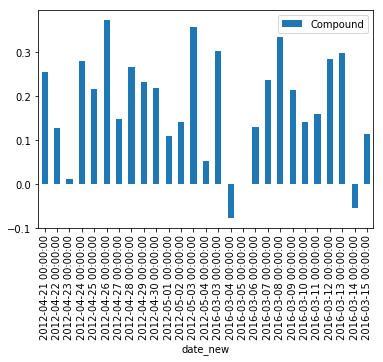

In [8]:
#plot groupby *x axis = day, y axis = compound sentiment score*
grouped = merged.groupby(['date_new'])
grouped.mean().reset_index().plot.bar("date_new", "Compound")
plt.savefig('nigelbradham.png')
plt.show()
